start: 2020/05/06 17:49:07


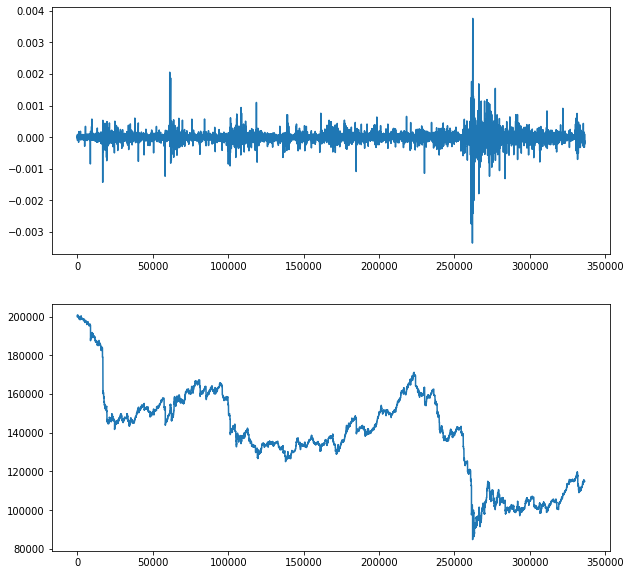

end: 2020/05/06 17:49:43


In [1]:
import pickle
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from mylib import bitcoin
from mylib import simulator
%matplotlib inline

def plot(b, s):
    x = b.data_test
    y_result = list(b.label_test)
    # y_pred = list(b.model.predict(x))  # TODO: Build in simulator.py
    y_asset = list(s.simulate(b.data_test, b.model))
    
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    #ax2.plot(list(range(len(x))), y_pred)
    ax2.plot(list(range(len(x))), y_asset)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    
    file_name = "train_v6"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)

    with open("models/" + file_name + ".pickle", mode="rb") as file:
        b.model = pickle.load(file)

    test_start = int(len(b.data) * 0.8)  # 最後20%のデータでテスト
    columns = b.data.columns
    columns = columns.drop(["result"])
    b.data_test = b.data[columns][test_start:]
    b.label_test = b.data["result"][test_start:]

    s = simulator.BitcoinSimulator(200000)

    plot(b, s)
    
    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()